# 1. Introduction

Welcome to this notebook where we will venture into the world of Machine Learning with one of its simplest, yet powerful techniques: Linear Regression. Here, we will predict the median price of homes in various Boston neighborhoods, using the widely-used Boston Housing dataset. This is a regression task, meaning we are trying to predict a continuous value (house prices) rather than a discrete label (e.g., spam or not-spam). Let's dive right in!

# 2. Importing the Necessary Libraries

As a good practice, we always start by importing all the libraries we'll need at the top. This makes it clear what our dependencies are, and ensures we have everything we need before we start coding.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import StandardScaler and LabelEncoder from scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics for classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# 3. Loading the Dataset

Now, let's load the Boston Housing dataset.

In [3]:
data = pd.read_csv('../data/winequality-white.csv', sep=';')

# 4. Preprocessing for EDA ( if necessary )

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 5. Exploratory Data Analysis ( EDA )

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/...` for a Cheat Sheet on all the basic things to look for.

In [6]:
data.shape

(4898, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
for col in data.columns:
    print(f"Column {col}: {data[col].unique().sum()}")

Column fixed acidity: 499.24999999999994
Column volatile acidity: 53.66499999999999
Column citric acid: 39.27999999999999
Column residual sugar: 3296.3
Column chlorides: 16.773
Column free sulfur dioxide: 7420.5
Column total sulfur dioxide: 37796.0
Column density: 884.62258
Column pH: 337.91999999999996
Column sulphates: 49.25999999999999
Column alcohol: 1160.8799999999999
Column quality: 42


<Axes: >

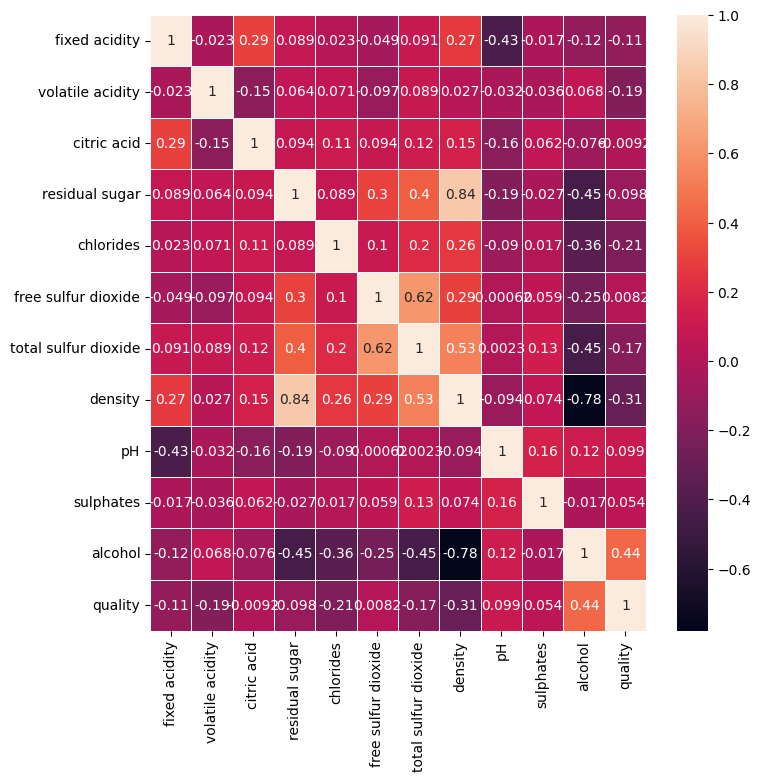

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax) # data needs to be numeric

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_ = data.copy()
data_ = data_.drop(['quality'], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_.columns
vif_data["VIF"] = [variance_inflation_factor(data_.values, i) for i in range(data_.shape[1])]
vif_data

,Feature,VIF
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


/var/folders/zy/lskfvfbn4sjb60xdtvky2y9w0000gn/T/ipykernel_25751/2266370350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/zy/lskfvfbn4sjb60xdtvky2y9w0000gn/T/ipykernel_25751/2266370350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var

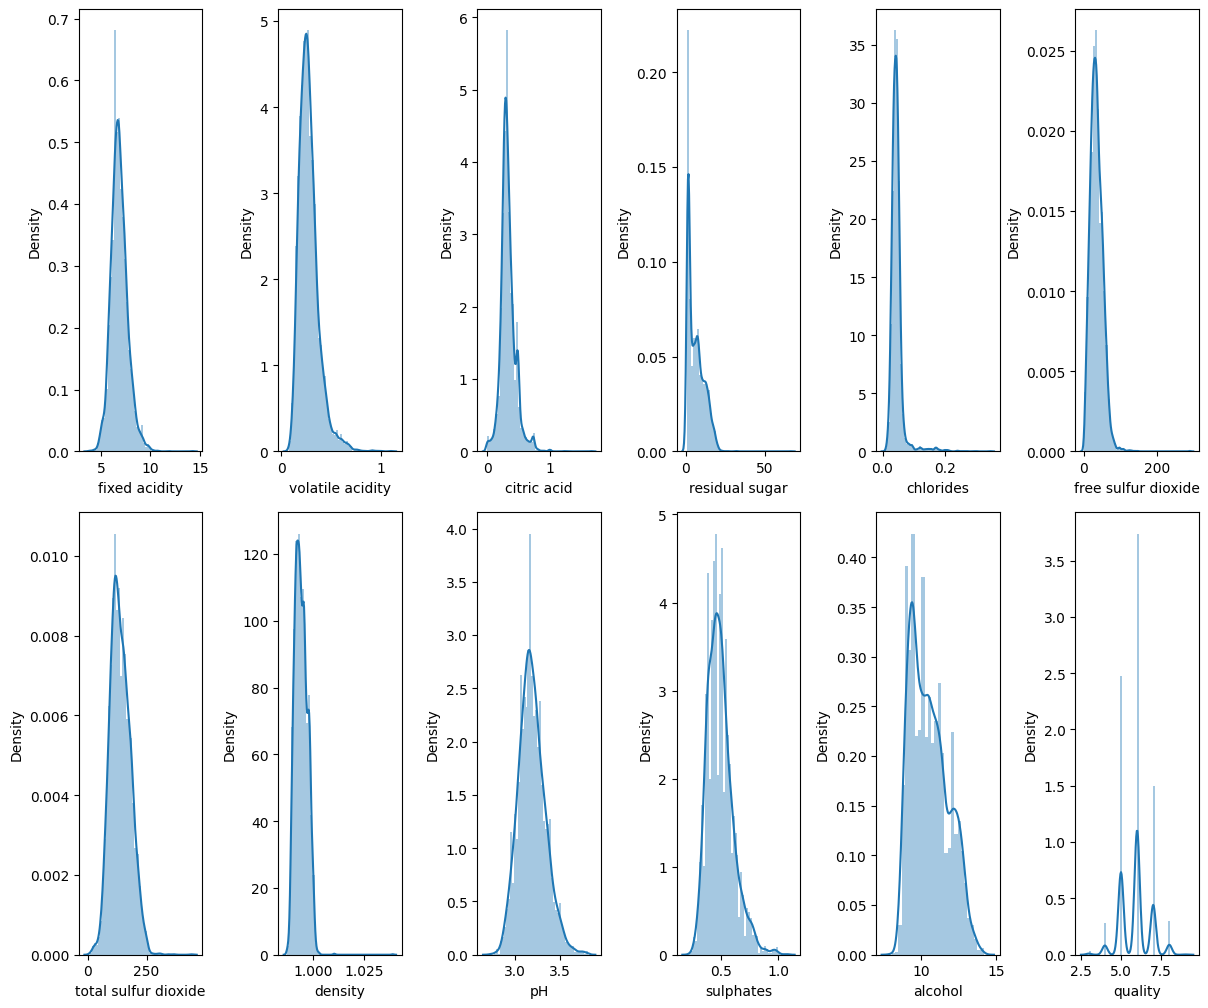

In [24]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(12,10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=1)

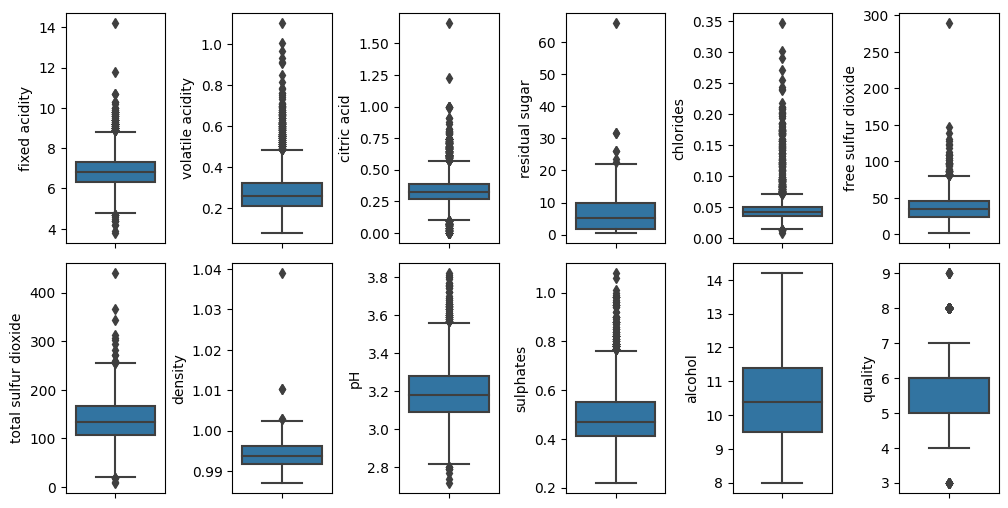

In [25]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=1)

In [29]:
outliers_percentage = {}
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Count outliers
    outliers_count = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    
    # Calculate percentage
    outliers_percentage[col] = (outliers_count / len(data[col])) * 100
outliers_percentage

{'fixed acidity': 2.4295630869742753,
 'volatile acidity': 3.79746835443038,
 'citric acid': 5.512454062882809,
 'residual sugar': 0.14291547570436913,
 'chlorides': 4.246631278072683,
 'free sulfur dioxide': 1.0208248264597795,
 'total sulfur dioxide': 0.38791343405471623,
 'density': 0.10208248264597795,
 'pH': 1.5312372396896692,
 'sulphates': 2.5316455696202533,
 'alcohol': 0.0,
 'quality': 4.083299305839118}

<Axes: xlabel='quality', ylabel='Count'>

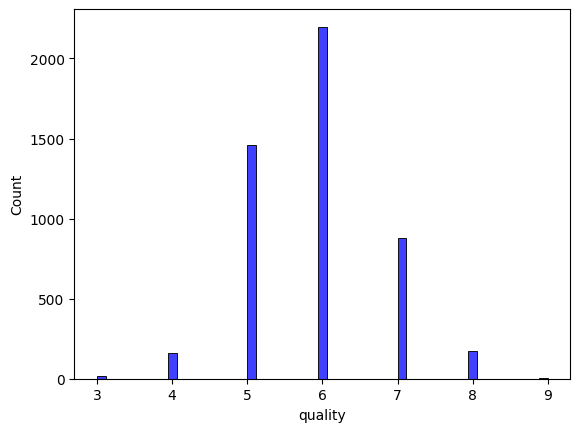

In [39]:
sns.histplot(x='quality', data=data, color='blue', label='White Wine')

# 6. Data Preprocessing

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/Preprocessing.md` for a Cheat Sheet on all the basic things to look for.

In [46]:
X = data.drop('quality', axis=1)
y = data['quality']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# 7. Model Implementation

Finally, we come to the heart of our notebook: implementing the Linear Regression model! We'll fit the model to our training data and make predictions on our testing data.

In [55]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
y_prob = rand_forest.predict_proba(X_test)

# 8. Model Evaluation

After we've made our predictions, we need to evaluate how well our model did. This will usually involve some sort of error metric, like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.24      0.35        25
           2       0.72      0.70      0.71       291
           3       0.67      0.81      0.73       432
           4       0.78      0.62      0.69       192
           5       0.94      0.43      0.59        35

    accuracy                           0.71       980
   macro avg       0.63      0.47      0.51       980
weighted avg       0.71      0.71      0.70       980



/Users/amanai/Machine_Learning_Cookbook/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amanai/Machine_Learning_Cookbook/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amanai/Machine_Learning_Cookbook/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [59]:
rand_forest.score(X_test, y_test)

0.7071428571428572

# 9. Conclusion

In this final section, we'll recap what we've done and learned in this notebook. We might also discuss what we could do in future projects or how we could improve our current model.

Remember, these are just guidelines. Your notebook should reflect your own style and approach to data science. The most important thing is that your notebook is clear, logical, and informative. Happy coding!

Note: You can insert these section headings into your Jupyter notebook by changing a cell's type to "Markdown" and typing in the text. You can run a markdown cell in the same way you'd run a code cell (Shift+Enter).

### Improvements:
- Handle Multicolinearity
- Handle Class Imbalance
- Try Ridge/Lasso Techniques